In [7]:
import numpy as np
from matplotlib import pyplot as plt
import sklearn

In [8]:
def distance(v1, v2):
    # Eucledian distance
    return np.sqrt(((v1-v2)**2).sum())

def knn(train, test, k=3):
    dist = []
    
    for i in range(train.shape[0]):
        # Get the vector and label
        ix = train[i, :-1]
        iy = train[i, -1]
        # Compute the distance from test point
        d = distance(test, ix)
        dist.append([d, iy])
    # Sort based on distance and get top k
    dk = sorted(dist, key=lambda x: x[0])[:k]
    # Retrieve only the labels
    labels = np.array(dk)[:, -1]
    
    # Get frequencies of each label
    output = np.unique(labels, return_counts=True)
    # Find max frequency and corresponding label
    index = np.argmax(output[1])
    return output[0][index]

In [9]:
from sklearn.datasets import load_digits

In [10]:
load_digits(return_X_y=True)[0].shape

(1797, 64)

In [11]:
data = load_digits(return_X_y=True)
X = data[0]
y = data[1]

print X.shape, y.shape

(1797, 64) (1797,)


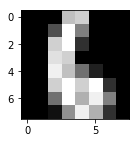

In [15]:
plt.figure(0, figsize=(2, 2))
plt.imshow(X[6].reshape((8, 8)), cmap='gray')
plt.show()

In [16]:
ds = np.concatenate((X, y.reshape((-1, 1))), axis=1)
print ds.shape

(1797, 65)


In [17]:
trainset = ds[:1500]
testset = ds[1500:]

print trainset.shape, testset.shape

(1500, 65) (297, 65)


In [18]:
def test_on_set(trainset, testing, k=3):
    preds = []
    target = []

    for ix in range(testing.shape[0]):
        out = knn(trainset, testing[ix, :-1], k=k)
        preds.append(out)
        target.append(testing[ix, -1])
    preds = np.asarray(preds)
    target = np.asarray(target)

    acc = float((preds == target).sum()) / len(preds)

    print "Accuracy: {} with k: {}".format(acc, k)
    return acc

In [19]:
accs = []
ks = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

for kx in ks:
    acx = test_on_set(trainset, testset, k=kx)
    accs.append(acx)

Accuracy: 0.956228956229 with k: 2
Accuracy: 0.959595959596 with k: 3
Accuracy: 0.959595959596 with k: 4
Accuracy: 0.956228956229 with k: 5
Accuracy: 0.946127946128 with k: 6
Accuracy: 0.946127946128 with k: 7
Accuracy: 0.942760942761 with k: 8
Accuracy: 0.942760942761 with k: 9
Accuracy: 0.942760942761 with k: 10
Accuracy: 0.942760942761 with k: 11
Accuracy: 0.942760942761 with k: 12
Accuracy: 0.939393939394 with k: 13
Accuracy: 0.942760942761 with k: 14
Accuracy: 0.939393939394 with k: 15
Accuracy: 0.946127946128 with k: 16
Accuracy: 0.942760942761 with k: 17
Accuracy: 0.939393939394 with k: 18


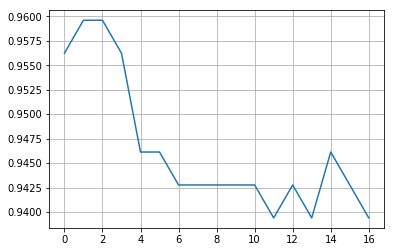

In [20]:
plt.figure(0)
plt.grid("on")
plt.plot(accs)

plt.show()